<a href="https://colab.research.google.com/github/Melanee-Melanee/Old-Persian-Cuneiform-OCR/blob/main/Old_Persian_Cuneiform_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The aim of this notebook is creating an OCR model for Old Persian Cuneiform
This notebook is a part of "Electronic Old Persian Library" (EOPL) project:

https://github.com/Melanee-Melanee/Old-Persian-Cuneiform-OCR

![](https://private-user-images.githubusercontent.com/74653444/341980621-f4d606df-e91f-4ae3-98bb-0cab68e6b8a1.png?jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3MTkyNDUxMzEsIm5iZiI6MTcxOTI0NDgzMSwicGF0aCI6Ii83NDY1MzQ0NC8zNDE5ODA2MjEtZjRkNjA2ZGYtZTkxZi00YWUzLTk4YmItMGNhYjY4ZTZiOGExLnBuZz9YLUFtei1BbGdvcml0aG09QVdTNC1ITUFDLVNIQTI1NiZYLUFtei1DcmVkZW50aWFsPUFLSUFWQ09EWUxTQTUzUFFLNFpBJTJGMjAyNDA2MjQlMkZ1cy1lYXN0LTElMkZzMyUyRmF3czRfcmVxdWVzdCZYLUFtei1EYXRlPTIwMjQwNjI0VDE2MDAzMVomWC1BbXotRXhwaXJlcz0zMDAmWC1BbXotU2lnbmF0dXJlPWZmOGFmZmRiZWE1NzhkNjk4YzliOWYzMGRmMzFhMzFiOTIyYmZiY2Y5YzJiMzZkNzc1MmM4MDQyNDlmMTQxMmMmWC1BbXotU2lnbmVkSGVhZGVycz1ob3N0JmFjdG9yX2lkPTAma2V5X2lkPTAmcmVwb19pZD0wIn0.ZJd507XKDwl6gWMEcw9sOAQQXNWchJq0lGrjCCf9imA)

# Steps:

1. Dataset Preparation: Annotate images with bounding boxes around each character.

2. Environment Setup: Install necessary libraries and import them.

3. Text detection: Train a YOLO model to detect characters in the dataset.

4. Text recognition: Train a CNN model to recognise characters.

5. Inference: Use YOLO for character detection and the CNN model for recognition on the custom image.

6. Visualization: Display detected and recognized text on the custom image.

# Step 2: Environment Setup: Install necessary libraries and import them

In [2]:
# mount this notebook to Goole Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.3/107.7 GB disk)


In [4]:
%cd /content/drive/MyDrive/Persiancuneiform1/persiancuneiformYOLOv8-1

/content/drive/MyDrive/Persiancuneiform1/persiancuneiformYOLOv8-1


In [5]:
!ls

 data	    'Persian-old (1).TTF'  'Persian-old (3).TTF'  'Persian-old (5).TTF'   runs
 data.yaml  'Persian-old (2).TTF'  'Persian-old (4).TTF'   Persian-old.TTF	  yolov8s.pt


# Step 3: Text detection: Train a YOLO model to detect characters in the dataset

In [ ]:
# Creating our custom yolo model

%cd /content/drive/MyDrive/Persiancuneiform1/persiancuneiformYOLOv8-1

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=50 imgsz=224 plots=True

/content/drive/MyDrive/Persiancuneiform1/persiancuneiformYOLOv8-1
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=50, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=

In [6]:
!ls runs/detect/train7

args.yaml					     results.csv	 train_batch2.jpg
confusion_matrix.png				     results.png	 val_batch0_labels.jpg
events.out.tfevents.1718472860.cc30ef7e4e3d.53194.0  train_batch0.jpg	 val_batch0_pred.jpg
F1_curve.png					     train_batch120.jpg  val_batch1_labels.jpg
P_curve.png					     train_batch121.jpg  val_batch1_pred.jpg
PR_curve.png					     train_batch122.jpg  weights
R_curve.png					     train_batch1.jpg


In [7]:
#Inference with Custom Model (inputing custom image)
!yolo task=detect mode=predict model=/content/drive/MyDrive/Persiancuneiform1/persiancuneiformYOLOv8-1/runs/detect/train7/weights/best.pt conf=0.25 source=/content/8gugu.JPG

2024-07-08 11:29:57.092419: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-08 11:29:57.092497: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-08 11:29:57.277615: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-08 11:29:57.621488: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-08 11:30:01.364537: W tensorflow/compiler/tf2

## Visualising YOLO detection

In [28]:
import cv2
from ultralytics import YOLO

# Load the custom YOLOv8 model
model = YOLO('/content/drive/MyDrive/Persiancuneiform1/persiancuneiformYOLOv8-1/runs/detect/train7/weights/best.pt')  # Replace with the path to your trained model

In [ ]:
# Load an image
image_path = '/content/8gugu.JPG'  # Replace with the path to your custom image
image = cv2.imread(image_path)
# Perform inference
results = model(image)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
Model summary (fused): 168 layers, 11138742 parameters, 0 gradients, 28.5 GFLOPs


In [ ]:
# S.M.Hosseini

# import pandas as pd

# LineString = ""
# df = pd.DataFrame()

# for result in results:
#     boxes = result.boxes.xyxy  # get boxes coordinates in xyxy format
#     confidences = result.boxes.conf  # get confidence scores
#     classes = result.boxes.cls  # get class IDs

#     for box, confidence, cls in zip(boxes, confidences, classes):
#         x1, y1, x2, y2 = map(int, box)
#         # label = f'{model.names[int(cls)]}: {confidence:.2f}'
#         label = model.names[int(cls)]
#         df = pd.concat([df, pd.DataFrame([{"label":label, "x1":x1}])], ignore_index=True)
#         LineString = LineString + model.names[int(cls)]



# # df = df.sort_values(by=['x1'], ascending=False)
# df = df.sort_values(by=['x1'])

# SortString = ""
# for index, row in df.iterrows():
#   SortString = SortString + row["label"]


# print("LineString : ",LineString)
# print("SortString : ", SortString)

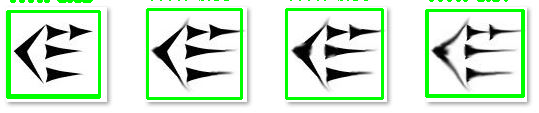

In [ ]:
# Process and visualize results
for result in results:
    boxes = result.boxes.xyxy  # get boxes coordinates in xyxy format
    confidences = result.boxes.conf  # get confidence scores
    classes = result.boxes.cls  # get class IDs

    for box, confidence, cls in zip(boxes, confidences, classes):
        x1, y1, x2, y2 = map(int, box)
        label = f'{model.names[int(cls)]}: {confidence:.2f}'

        # Draw the bounding box and label on the image
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Show the image
from google.colab.patches import cv2_imshow

# After drawing bounding boxes
cv2_imshow(image)

##Install Old Persian Cuneiform (Achaemenid) font or Akkadian font(Santakku.ttf)

In [ ]:
!mkdir -p ~/.local/share/fonts


In [ ]:
!find / -name matplotlib

/usr/local/lib/python3.10/dist-packages/holoviews/tests/plotting/matplotlib
/usr/local/lib/python3.10/dist-packages/holoviews/examples/gallery/demos/matplotlib
/usr/local/lib/python3.10/dist-packages/holoviews/examples/reference/elements/matplotlib
/usr/local/lib/python3.10/dist-packages/holoviews/examples/reference/containers/matplotlib
/usr/local/lib/python3.10/dist-packages/arviz/plots/backends/matplotlib
/usr/local/lib/python3.10/dist-packages/matplotlib
/root/.config/matplotlib
find: ‘/proc/63/task/63/net’: Invalid argument
find: ‘/proc/63/net’: Invalid argument


In [ ]:
!fc-cache -f -v


/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 1 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: caching, new cache contents: 1 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
!mv Persian-old.TTF  ~/.local/share/fonts/


In [ ]:
# Install the font in Colab
import shutil

# Copy the font file to the fonts directory
shutil.copy('/content/Persian-old.TTF', '/usr/share/fonts/truetype/')


'/usr/share/fonts/truetype/Persian-old.TTF'

In [ ]:
import matplotlib.font_manager
fonts = matplotlib.font_manager.findSystemFonts()
font_names = [matplotlib.font_manager.FontProperties(fname=f).get_name() for f in fonts]
print(font_names)

['Liberation Mono', 'Andale Mono', 'Trebuchet MS', 'Comic Sans MS', 'Trebuchet MS', 'Liberation Sans', 'Liberation Sans Narrow', 'Verdana', 'Webdings', 'Impact', 'Trebuchet MS', 'Courier New', 'Arial', 'Georgia', 'Georgia', 'Comic Sans MS', 'Courier New', 'SantakkuM', 'Georgia', 'Arial Black', 'Liberation Serif', 'Verdana', 'Georgia', 'Liberation Sans', 'Arial Black', 'Trebuchet MS', 'Liberation Sans', 'Liberation Sans Narrow', 'Times New Roman', 'Courier New', 'Arial', 'Liberation Serif', 'Times New Roman', 'Humor Sans', 'Comic Sans MS', 'Verdana', 'Courier New', 'Liberation Mono', 'Times New Roman', 'Courier New', 'Courier New', 'Liberation Sans Narrow', 'persian-old', 'Verdana', 'Georgia', 'Georgia', 'persian-old', 'Trebuchet MS', 'Trebuchet MS', 'Arial', 'Liberation Serif', 'Verdana', 'Arial', 'Impact', 'Webdings', 'Georgia', 'Liberation Serif', 'Arial', 'Times New Roman', 'Liberation Mono', 'Times New Roman', 'Comic Sans MS', 'Verdana', 'Courier New', 'Trebuchet MS', 'Verdana', 'G

In [ ]:
# !sudo apt install msttcorefonts -qq
!rm ~/.cache/matplotlib -rf

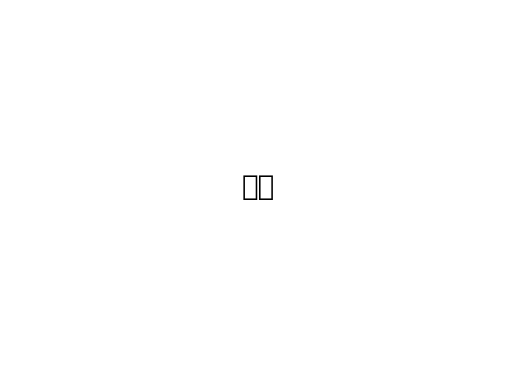

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Add the new font to matplotlib
font_manager.fontManager.addfont('/usr/share/fonts/truetype/Persian-old.TTF')

# Set the font family to use the new font
plt.rcParams['font.family'] = 'Persian-old.TTF'


# Example plot
plt.text(0.5, 0.5, '𐎢𐎢', fontsize=20, ha='center')
plt.axis('off')
plt.show()


# Visualising...

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
Model summary (fused): 168 layers, 11138742 parameters, 0 gradients, 28.5 GFLOPs
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 66474 (\N{OLD PERSIAN SIGN JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 66470 (\N{OLD PERSIAN SIGN GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


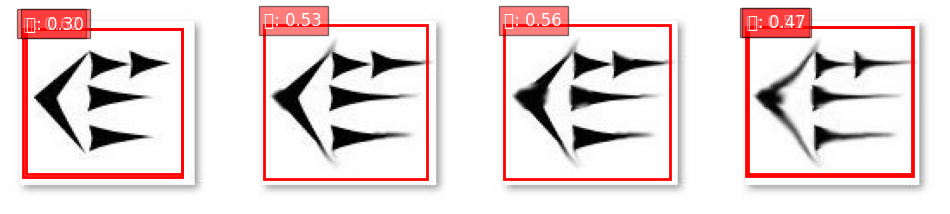

In [ ]:
import os
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from ultralytics import YOLO

# Define the paths
model_path = '/content/drive/MyDrive/Persiancuneiform1/persiancuneiformYOLOv8-1/runs/detect/train7/weights/best.pt'  # Replace with your model path
image_path = '//content/8gugu.JPG'  # Replace with your image path


# Load the custom YOLOv8 model
model = YOLO(model_path)

# Load the image
image = Image.open(image_path)

# Perform inference
results = model(image)

# Visualize results
fig, ax = plt.subplots(1, figsize=(12, 9))

# Display the image
ax.imshow(image)

# Plot each box
for result in results:
    boxes = result.boxes.xyxy  # Get boxes coordinates in xyxy format
    confidences = result.boxes.conf  # Get confidence scores
    classes = result.boxes.cls  # Get class IDs

    for box, confidence, cls in zip(boxes, confidences, classes):
        x1, y1, x2, y2 = map(int, box)
        width, height = x2 - x1, y2 - y1
        label = f'{model.names[int(cls)]}: {confidence:.2f}'

        # Create a Rectangle patch
        rect = patches.Rectangle((x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

        # Add label
        plt.text(x1, y1, label, fontsize=12, color='white', bbox=dict(facecolor='red', alpha=0.5))

# Show the plot
plt.axis('off')  # Hide axes
plt.show()

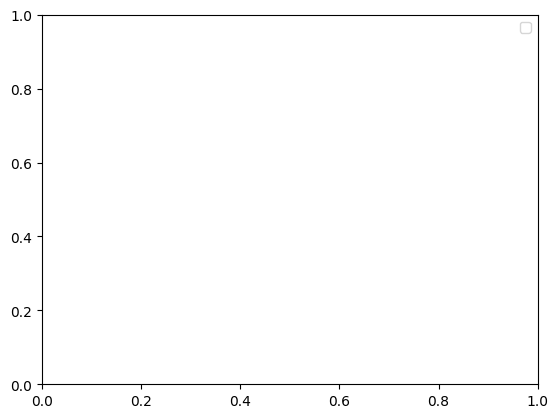

Title: 
X-axis label: 
Y-axis label: 
Legend labels: []


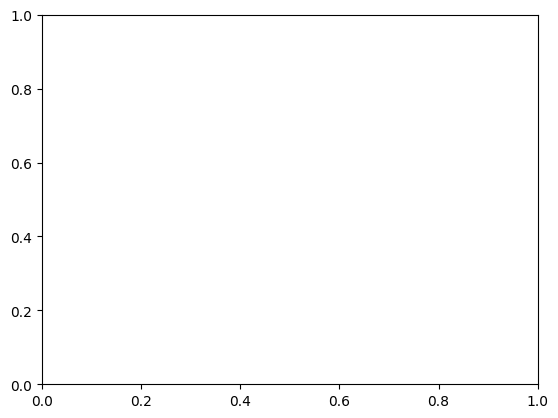

In [ ]:
# import matplotlib.pyplot as plt

# # Create a simple plot with labels
# # plt.plot([1, 2, 3, 4], [10, 20, 25, 30], label='Line 1')
# # plt.plot([1, 2, 3, 4], [30, 25, 20, 10], label='Line 2')

# # # Set title and labels
# # plt.title('Sample Plot')
# # plt.xlabel('X-axis Label')
# # plt.ylabel('Y-axis Label')

# # Add legend
# plt.legend()

# # Show plot
# plt.show()

# # Print labels
# # Print title
# print("Title:", plt.gca().get_title())

# # Print x-axis label
# print("X-axis label:", plt.gca().get_xlabel())

# # Print y-axis label
# print("Y-axis label:", plt.gca().get_ylabel())

# # Print legend labels
# handles, labels = plt.gca().get_legend_handles_labels()
# print("Legend labels:", labels)


In [ ]:
# import cv2
# import numpy as np

# # Create a black image
# # image = np.zeros((500, 500, 3), dtype=np.uint8)

# # Define some text labels to print
# labels = {
#     "Top Left": (50, 50),
#     "Top Right": (350, 50),
#     "Bottom Left": (50, 450),
#     "Bottom Right": (350, 450),
# }

# # Font settings
# font = cv2.FONT_HERSHEY_SIMPLEX
# font_scale = 1
# font_color = (255, 255, 255)  # White
# line_type = 2

# # Draw the text labels on the image
# # for label, position in labels.items():
# #   cv2.putText(image, label, position, font, font_scale, font_color, line_type)

# from google.colab.patches import cv2_imshow


# # Display the image with labels
# cv2_imshow(image)

# # Wait until a key is pressed and close the window
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()

# # Print the labels and their positions
# print("Labels and their positions:")
# for label, position in labels.items():
#     print(f"{label}: {position}")


# Step 4: Text recognition: Train a CNN model to recognise characters


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define a simple CNN model for character recognition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(34, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Prepare data generators
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Persiancuneiform1/persiancuneiformYOLOv8-1/cnndata/data/train',
    target_size=(32, 32),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Persiancuneiform1/persiancuneiformYOLOv8-1/cnndata/data/valid',
    target_size=(32, 32),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical'
)

# Train the OCR model
model.fit(train_generator, epochs=5, validation_data=val_generator)


Found 34 images belonging to 34 classes.
Found 34 images belonging to 34 classes.
Epoch 1/5
2/2 [==============================] - 15s 13s/step - loss: 3.6154 - accuracy: 0.0000e+00 - val_loss: 3.5891 - val_accuracy: 0.0588
Epoch 2/5
2/2 [==============================] - 0s 209ms/step - loss: 3.5883 - accuracy: 0.0588 - val_loss: 3.5470 - val_accuracy: 0.0294
Epoch 3/5
2/2 [==============================] - 1s 533ms/step - loss: 3.5446 - accuracy: 0.0294 - val_loss: 3.5284 - val_accuracy: 0.0294
Epoch 4/5
2/2 [==============================] - 1s 601ms/step - loss: 3.5344 - accuracy: 0.0294 - val_loss: 3.5287 - val_accuracy: 0.0294
Epoch 5/5
2/2 [==============================] - 1s 497ms/step - loss: 3.5459 - accuracy: 0.0294 - val_loss: 3.5471 - val_accuracy: 0.0294


In [25]:
model.save('/content/drive/MyDrive/Persiancuneiform1/persiancuneiform_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Step 5: Inference: Use YOLO for character detection and the CNN model for recognition on the custom image

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
Model summary (fused): 168 layers, 11138742 parameters, 0 gradients, 28.5 GFLOPs


1/1 [==============================] - 0s 89ms/step
Detected text: B
1/1 [==============================] - 0s 30ms/step
Detected text: B
1/1 [==============================] - 0s 29ms/step
Detected text: B
1/1 [==============================] - 0s 30ms/step
Detected text: B
1/1 [==============================] - 0s 23ms/step
Detected text: B
1/1 [==============================] - 0s 30ms/step
Detected text: B


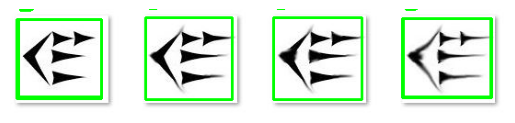

In [40]:
# Load the trained YOLO model
model = YOLO('/content/drive/MyDrive/Persiancuneiform1/persiancuneiformYOLOv8-1/runs/detect/train7/weights/best.pt')
# # Perform inference on a new image

results = model('/content/8gugu.JPG')

# Load the trained OCR model
ocr_model = tf.keras.models.load_model('/content/drive/MyDrive/Persiancuneiform1/persiancuneiform_model.h5')

# Load the image using OpenCV
import cv2
image_path = '/content/8gugu.JPG'
image_cv = cv2.imread(image_path)
gray = cv2.cvtColor(image_cv, cv2.COLOR_BGR2GRAY)

# Iterate over detected bounding boxes
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        roi = gray[y1:y2, x1:x2]  # Extract region of interest

        # Resize the ROI to the input size of the OCR model
        roi_resized = cv2.resize(roi, (32, 32))
        roi_resized = roi_resized.reshape(1, 32, 32, 1) / 255.0  # Normalize

        # Recognize character
        prediction = ocr_model.predict(roi_resized)
        predicted_char = chr(tf.argmax(prediction, axis=1).numpy()[0] + ord('A'))  # Map to character

        print(f'Detected text: {predicted_char}')

        # Draw the bounding box and recognized text on the image
        cv2.rectangle(image_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image_cv, predicted_char, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image with detections and recognized text
import matplotlib.pyplot as plt

plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
